### Implement activation functions and visualize them

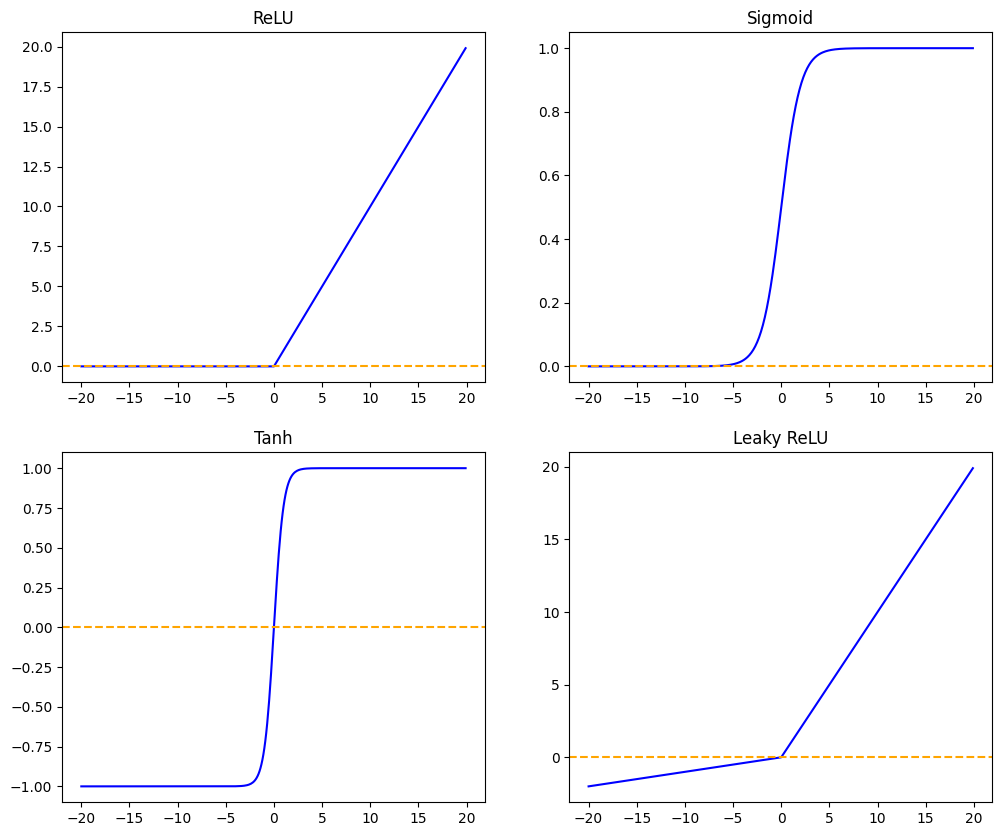

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def relu(x):
    return np.maximum(0, x)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def tanh(x):
    a = np.exp(x)
    b = 1 / a
    return (a - b) / (a + b)
def leaky_relu(x, a=0.1):
    return np.maximum(a*x, x)

x = np.arange(-20, 20, 0.1)
fig, axes = plt.subplots(2, 2, figsize=((12, 10)))
axes = axes.flatten()
Y = [relu(x), sigmoid(x), tanh(x), leaky_relu(x, 0.1)]
funcs = ['ReLU', 'Sigmoid', 'Tanh', 'Leaky ReLU']
for i in range(4):    
    axes[i].set_title(funcs[i])
    axes[i].plot(x, Y[i], color='blue')
    axes[i].axhline(0, color='orange', linestyle='--')

### visualize their derivatives

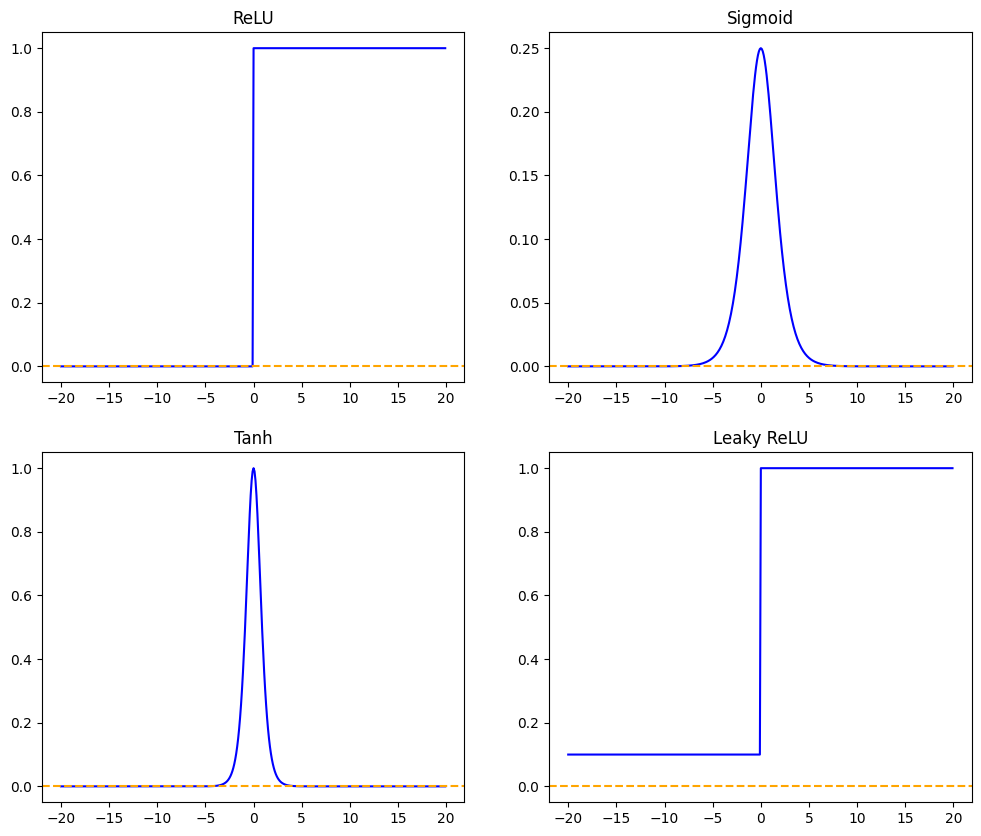

In [2]:
def relu_derivative(x):
    return np.where(x > 0, 1, 0)
def sigmoid_derivative(x):
    f = sigmoid(x)
    return f * (1 - f)
def tanh_derivative(x):
    return 1 - (tanh(x) ** 2)
def leaky_relu_derivative(x, a=0.1):
    return np.where(x > 0, 1, a)

x = np.arange(-20, 20, 0.1)
fig, axes = plt.subplots(2, 2, figsize=((12, 10)))
axes = axes.flatten()
Y = [relu_derivative(x), sigmoid_derivative(x), tanh_derivative(x), leaky_relu_derivative(x, 0.1)]
funcs = ['ReLU', 'Sigmoid', 'Tanh', 'Leaky ReLU']
for i in range(4):    
    axes[i].set_title(funcs[i])
    axes[i].plot(x, Y[i], color='blue')
    axes[i].axhline(0, color='orange', linestyle='--')

plt.show()

### Implement simple feed forward and bakward propagation

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

np.random.seed(42)
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))        
    return e_x / np.sum(e_x, axis=1, keepdims=True)

X, y = load_iris(return_X_y=True)
output_dim  = len(np.unique(y))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)
y_train_onehot = np.eye(len(y), output_dim)[y_train]

W1 = np.random.randn(X.shape[1], 10) * 0.1
b1 = np.random.randn(10) * 0.1
W2 = np.random.randn(10, 6) * 0.1
b2 = np.random.randn(6) * 0.1
W3 = np.random.randn(6, output_dim) * 0.1
b3 = np.random.randn(output_dim) * 0.1

def feed_forward(X):        
    Z1 = X.dot(W1) + b1    
    A1 = relu(Z1)    
    
    Z2 = A1.dot(W2) + b2
    A2 = relu(Z2)

    
    Z3 = A2.dot(W3) + b3    
    y_pred_proba = softmax(Z3)        

    return {'X': X, 'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2, 'Z3': Z3, 'y_pred_proba': y_pred_proba}  
    

computations = feed_forward(X_train)
y_pred_proba = computations['y_pred_proba']

def backward_propagation():
    dZ3 = computations['y_pred_proba'] - y_train_onehot
    dW3 = computations['A2'].T.dot(dZ3)
    dA2 = dZ3.dot(W3.T)
    db3 = np.sum(dZ3, axis=0)

    dZ2 = dA2 * np.where(computations['Z2'] > 0, 1, 0)
    dW2 = computations['A1'].T.dot(dZ2)
    dA1 = dZ2.dot(W2.T)
    db2 = np.sum(dZ2, axis=0)

    dZ1 = dA1 * np.where(computations['Z1'] > 0, 1, 0)
    dW1 = computations['X'].T.dot(dZ1)
    # dX = dZ1.dot(W1.T)
    db1 = np.sum(dZ1, axis=0)

    
    return {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2, 'dW3': dW3, 'db3': db3}

### Let's create a class

In [4]:
class MyFirstNeuralNetworkClassifier:
    def __init__(self, input_dim, output_dim, learning_rate=0.0001,epochs=1000, tol=1e-10):            
        self.tol = tol
        self.lr = learning_rate
        self.epochs = epochs        


        self.W1 = np.random.normal(0, np.sqrt(2/input_dim), (input_dim, 10))        
        self.b1 = np.random.normal(0, np.sqrt(2/input_dim), 10)        
        
        self.W2 = np.random.normal(0, np.sqrt(2/10), (10, 6))        
        self.b2 = np.random.normal(0, np.sqrt(2/10), 6)        

        self.W3 = np.random.normal(0, np.sqrt(2/6), (6, output_dim))        
        self.b3 = np.random.normal(0, np.sqrt(2/6), output_dim)                

    def _cce(self, y_true_onehot, y_pred_proba):
        return -np.mean(np.sum(y_true_onehot * np.log(np.clip(y_pred_proba, 1e-10, 1)), axis=1))

    def fit(self, X, y_onehot):             
        prev_loss = float('inf')

        for i in range(self.epochs):                    
            y_pred_proba = self.predict_proba(X)
            loss = self._cce(y_onehot, y_pred_proba)
            if i % 50 == 0:
                print('Loss:', loss)
            if prev_loss - loss < self.tol:                                
                break            
            prev_loss = loss


            # backward propagation
            dZ3 = y_pred_proba - y_onehot
            dW3 = self.A2_.T.dot(dZ3)
            dA2 = dZ3.dot(self.W3.T)
            db3 = np.sum(dZ3, axis=0)

            dZ2 = dA2 * np.where(self.Z2_ > 0, 1, 0)
            dW2 = self.A1_.T.dot(dZ2)
            dA1 = dZ2.dot(self.W2.T)
            db2 = np.sum(dZ2, axis=0)

            dZ1 = dA1 * np.where(self.Z1_ > 0, 1, 0)
            dW1 = X.T.dot(dZ1)
            db1 = np.sum(dZ1, axis=0)


            self.W3 -= self.lr * dW3
            self.b3 -= self.lr * db3
            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2
            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1               
    
    def predict_proba(self, X):
        self.Z1_ = X.dot(self.W1) + self.b1    
        self.A1_ = relu(self.Z1_)    
        
        self.Z2_ = self.A1_.dot(self.W2) + self.b2
        self.A2_ = relu(self.Z2_)
        
        self.Z3_ = self.A2_.dot(self.W3) + self.b3            
          
        return softmax(self.Z3_)                    
    
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

In [5]:
model = MyFirstNeuralNetworkClassifier(X.shape[1], len(np.unique(y)))
model.fit(X_train, y_train_onehot)

Loss: 15.192130104983615
Loss: 0.8063148802193508
Loss: 0.7141050729097697
Loss: 0.6419719190196319
Loss: 0.5751578070184123
Loss: 0.513513888566844
Loss: 0.46049065115786464
Loss: 0.41866362794113116
Loss: 0.3856537975621915
Loss: 0.35750500167255506
Loss: 0.33216140628512203
Loss: 0.3080438778149582
Loss: 0.2845279909213819
Loss: 0.26164461103888953
Loss: 0.23982890876611787
Loss: 0.21958115285849758
Loss: 0.20116718132212494
Loss: 0.18473806920831018
Loss: 0.17029590899361688
Loss: 0.1576826656602739


In [6]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



YES!